### Randomness
Elements of Data Science Week 7

# Simulation Learning Goals
Simulate a task dependent on probability such as a die roll, repeat to get distribution and characteristics (mean, ...)
- Probability
    - np.random.choice()
- Simulation: Sample the distribution
    - Repeat and collect outcomes
    - Iteration: 
        `for i in np.arange(samples)`
- Examine resulting distribution of outcomes
    - Probability distribution
    - Uncertainty

#### A random distributions play a large role in statistical inference

In [104]:
import numpy as np
from datascience import *

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Fix for datascience plots
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

## Coin toss

In [106]:
# Create the choices
toss = np.array(['Heads', 'Tails'])

# Similar ten coin tosses
tosses=np.random.choice(toss,10)

# Results
tosses

array(['Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads',
       'Tails', 'Tails', 'Tails'],
      dtype='<U5')

In [107]:
tosses != 'Tails'

array([ True,  True, False,  True, False, False,  True, False, False, False], dtype=bool)

In [108]:
# Fraction of tosses that were heads
np.count_nonzero(tosses == 'Heads')/len(tosses)

0.4

In [109]:
# Why does this also work?
sum(tosses == 'Heads')/len(tosses)

0.40000000000000002

DIGRESSION: Notice that these two do the same thing. "make_array" is just syntatic sugar for np.array()

In [110]:
make_array('Heads', 'Tails')

array(['Heads', 'Tails'],
      dtype='<U5')

In [111]:
np.array(['Heads', 'Tails'])

array(['Heads', 'Tails'],
      dtype='<U5')

### Simulate
- Simulate a set of 100 coin tosses, how many heads?
- Repeat simulation 20,000 times

In [112]:
def simulate_100_tosses():
    outcomes = np.random.choice(toss, 100)
    return np.count_nonzero(outcomes == 'Heads')

In [113]:
simulate_100_tosses()

42

Now we so 20,000 simulationa of tossing a coin 100 times. (You can try this experiment at home with a real coin, if you have a free month or two.)

In [114]:
num_repetitions = 20000   # number of repetitions

heads = make_array() # empty collection array

for i in np.arange(num_repetitions):   # repeat the process num_repetitions times
    new_value = simulate_100_tosses()  # simulate one value using the function defined
    heads = np.append(heads, new_value) # augment the collection array with the simulated value

# That's it! The simulation is done.

In [115]:
simulation_results = Table().with_columns(
    'Repetition', np.arange(1, num_repetitions + 1),
    'Number of Heads', heads
)

In [116]:
# Each row in the table is the result of a tossed a coin 100 times.
simulation_results.show(3)

Repetition,Number of Heads
1,57
2,50
3,53


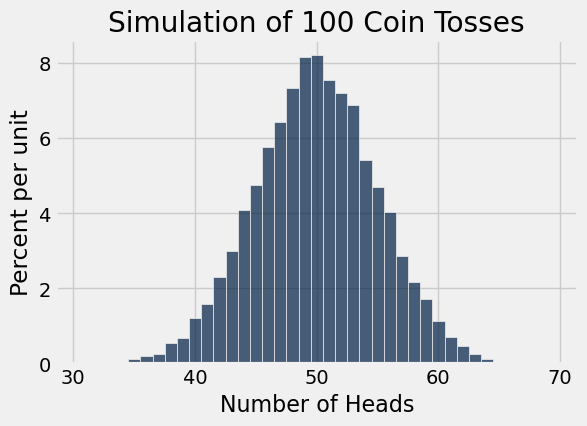

In [117]:
simulation_results.hist('Number of Heads', bins = np.arange(30.5, 69.6, 1))
plt.title('Simulation of 100 Coin Tosses') # Notice the matplotlib call to add a title
plt.savefig('Simcoin.png') # This matplotlib call saves the figure into the current folder

## Thought problem
A couple getting a divorce has split up the big-ticket items. They are now looking for a fair way to divide up the smaller assets that are of roughly equal value that they don't want to sell. They decide to toss a coin for all of these items.

Explain why this is a bad idea. Can you think of a more equitable way to divide their stuff?

## Die roll betting simulation
Bet a dollar on a single die roll
Outcomes

    - 0 or 1: lose a dollar (-$1)
    - 2 or 3: no change (0)
    - 4 or 5: gain a dollar (+$1)

In [118]:
# Make sure you understand how this if-else structure works in this case
def bet_on_one_roll():
    """Returns my net gain on one bet"""
    x = np.random.choice(np.arange(1, 7))  # roll a die once and record the number of spots
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

In [119]:
outcomes = np.array([])

for i in np.arange(600):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)
    
print(outcomes[0:10])
len(outcomes)

[-1.  0. -1.  1. -1.  0. -1. -1.  1.  0.]


600

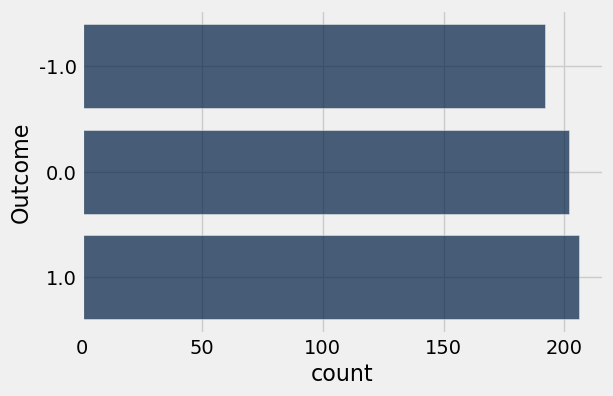

In [120]:
# Notice the use of group() to return the counts of each outcome.
outcome_table = Table().with_column('Outcome', outcomes)
outcome_table.group('Outcome').barh(0)

**Run the previous two cells a couple of times.** 

Do you always get the same result. Why or why not?

# Sampling
If we know the probabality distribution, we can simulate drawing a random sample of any size from that distribution. 

In [121]:
# Generate a population of purple and green marbles
marbles = np.random.choice(['purple','green'],100)
population =Table().with_columns('Color',marbles)
population

Color
green
green
green
purple
purple
purple
purple
green
green
purple


In [122]:
# Find the true fraction of the population of marbles that is purple.
population.where('Color','purple').num_rows/population.num_rows

0.57

In [123]:
# Take a sample of ten marbles
sample = population.sample(10)
sample

Color
purple
purple
green
purple
purple
green
purple
purple
purple
green


In [124]:
# Is the fraction of purple marbles in the sample the same as in the population?
sample.where('Color','purple').num_rows

7

In [125]:
# Simulate taking a sample of 10 marbles 1000 times
outcomes = np.array([])

for i in np.arange(1000):
    outcome = population.sample(10).where('Color','purple').num_rows/10
    outcomes = np.append(outcomes, outcome)
    
print(outcomes[0:10])
len(outcomes)

[ 0.6  0.8  0.5  0.7  0.5  0.5  0.2  0.4  0.6  0.8]


1000

In [126]:
# Is the mean of the simulations equal to the value of the true population?
# Do you think it would converge on the true value with more simulations?
outcomes.mean()

0.57079999999999997

In [127]:
outcome_table = Table().with_column('Outcome', outcomes)
outcome_table

Outcome
0.6
0.8
0.5
0.7
0.5
0.5
0.2
0.4
0.6
0.8


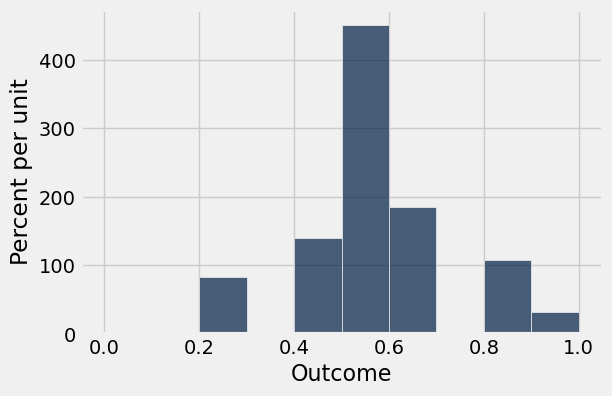

In [128]:
outcome_table.hist('Outcome')